In [97]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "fivethirtyeight/the-ultimate-halloween-candy-power-ranking"
)

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/versions/1


In [98]:
!/Users/jeongho/.cache/kagglehub/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/versions/1

zsh:1: permission denied: /Users/jeongho/.cache/kagglehub/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/versions/1


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


df = pd.read_csv(os.path.join(path, "candy-data.csv"))

In [100]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [102]:
df = df.drop(["competitorname"], axis=1)

In [103]:
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


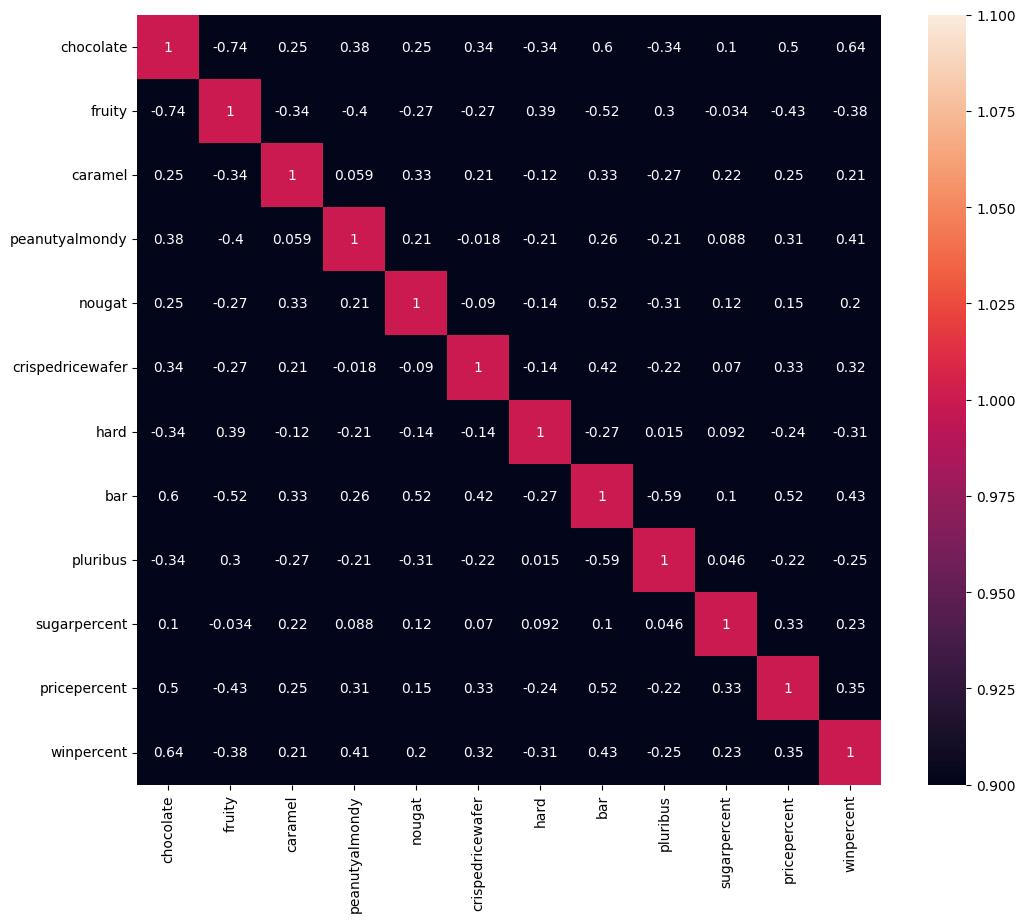

In [104]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=1, vmax=1)
plt.show()

In [114]:
abs(corr["bar"].sort_values(ascending=False))

bar                 1.000000
chocolate           0.597421
nougat              0.522976
pricepercent        0.518407
winpercent          0.429929
crispedricewafer    0.423751
caramel             0.333960
peanutyalmondy      0.260420
sugarpercent        0.099985
hard                0.265165
fruity              0.515066
pluribus            0.593409
Name: bar, dtype: float64

In [105]:
y = df["bar"]
X = df.drop(["bar"], axis=1)

In [106]:
y

0     1
1     1
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    0
Name: bar, Length: 85, dtype: int64

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
std_X = scaler.fit_transform(X)

std_X

array([[1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.73797339, 0.87979275,
        0.72125084],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.60696006, 0.51813469,
        0.73147538],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10880829,
        0.15899819],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.51813469,
        0.38343215],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.91606964, 0.51813469,
        0.48426579],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.46468783, 0.7834197 ,
        0.45196773],
       [1.        , 0.        , 1.        , 1.        , 1.

In [108]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [110]:
model.score(X_test, y_test)

0.8846153846153846